# Prevendo as notas de Matemática do Enem 2016

## Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import string as str
import matplotlib.pyplot as plt
import scipy.stats as sct
from sklearn.linear_model import LinearRegression

In [3]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [4]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Análise Exploratória de Dados

In [5]:
test.shape

(4570, 43)

In [8]:
train.shape

(13730, 167)

Nota-se que a base de dados de treino possui colunas a mais do que a base de dados de testes. Assim, o primeiro passo será transformar a base de treino numa base compatível com a base de testes. 

In [9]:
colunas_test = test.columns
train_new = train[colunas_test]
train_new

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,80.0,580.0,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,NaN,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,NaN,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,NaN,E,D,C,A,A,B,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,35,SP,20,M,1,1,1,3,1,...,40.0,440.0,E,E,G,B,B,B,C,A
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,26,PE,33,F,3,2,1,10,1,...,80.0,560.0,A,A,C,A,B,B,I,A
13727,5354503700ecf2388f68990435390b6e1ad454ee,43,RS,15,F,1,1,3,0,1,...,120.0,600.0,C,G,B,A,B,A,NaN,A
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,33,RJ,36,M,3,1,4,0,1,...,100.0,460.0,B,D,G,B,B,C,E,A


In [10]:
train_new = pd.concat([train_new, train['NU_NOTA_MT']], axis = 1)
train_new

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,35,SP,20,M,1,1,1,3,1,...,440.0,E,E,G,B,B,B,C,A,403.2
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,26,PE,33,F,3,2,1,10,1,...,560.0,A,A,C,A,B,B,I,A,452.4
13727,5354503700ecf2388f68990435390b6e1ad454ee,43,RS,15,F,1,1,3,0,1,...,600.0,C,G,B,A,B,A,NaN,A,398.0
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,33,RJ,36,M,3,1,4,0,1,...,460.0,B,D,G,B,B,C,E,A,386.6


### 1 - Tratando os dados da base de treino

In [11]:
analise_train = pd.DataFrame({'tipo': train_new.dtypes,
                    'missing' : train_new.isna().sum(),
                    'size' : train_new.shape[0],
                    'unicos': train_new.nunique()})
analise_train['percentual_missing'] = round(analise_train['missing'] / analise_train['size'],3)
analise_train

,tipo,missing,size,unicos,percentual_missing
NU_INSCRICAO,object,0,13730,13730,0.000
CO_UF_RESIDENCIA,int64,0,13730,27,0.000
SG_UF_RESIDENCIA,object,0,13730,27,0.000
NU_IDADE,int64,0,13730,55,0.000
TP_SEXO,object,0,13730,2,0.000
TP_COR_RACA,int64,0,13730,6,0.000
TP_NACIONALIDADE,int64,0,13730,5,0.000
TP_ST_CONCLUSAO,int64,0,13730,4,0.000
TP_ANO_CONCLUIU,int64,0,13730,11,0.000
TP_ESCOLA,int64,0,13730,4,0.000


In [12]:
analise_train[analise_train['missing']!=0]

,tipo,missing,size,unicos,percentual_missing
TP_ENSINO,float64,9448,13730,3,0.688
TP_DEPENDENCIA_ADM_ESC,float64,9448,13730,4,0.688
NU_NOTA_CN,float64,3389,13730,2692,0.247
NU_NOTA_CH,float64,3389,13730,2978,0.247
NU_NOTA_LC,float64,3597,13730,2774,0.262
TP_STATUS_REDACAO,float64,3597,13730,9,0.262
NU_NOTA_COMP1,float64,3597,13730,15,0.262
NU_NOTA_COMP2,float64,3597,13730,13,0.262
NU_NOTA_COMP3,float64,3597,13730,12,0.262
NU_NOTA_COMP4,float64,3597,13730,14,0.262


As colunas `TP_ENSINO`, `TP_DEPENDENCIA_ADM_ESC` e `Q027` possuem mais de 50% dos dados nulos, assim essas colunas não apresentam muita informação para auxiliar o modelo e, serão excluídas da análise. 



Observando a análise abaixo, temos que a coluna `NU_NOTA_REDACAO` é a soma dos valores das colunas `NU_NOTA_COMP1`, `NU_NOTA_COMP2`, `NU_NOTA_COMP3`, `NU_NOTA_COMP4` e `NU_NOTA_COMP5`, assim temos que toda a informação está na coluna `NU_NOTA_REDACAO`, portanto ficaremos somente com essa coluna na base de dados. 

In [13]:
train_new.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,4282.000000,13730.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,2.259692,0.001238,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,482.497928
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.698586,0.035167,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,99.826323
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,408.900000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,461.200000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,537.600000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,952.000000


Abaixo podemos ver que os Ids que não tem nota de Ciências da Natureza também não possuem nota de Ciências Humanas. Possivelmente esses alunos não realizaram a prova nesse dia, sendo assim, vamos remover da base esses IDs pois eles não apresentarão a mesma informação de um aluno que participou dos dois dias de teste. 

In [14]:
#alunos_sem_nota_naturais = list(train_new[train_new['NU_NOTA_CN'].isna() == True]['NU_INSCRICAO'])
#alunos_sem_nota_humanas = list(train_new[train_new['NU_NOTA_CH'].isna() == True]['NU_INSCRICAO'])
#alunos_sem_nota_naturais == alunos_sem_nota_humanas

Como vemos abaixo, os Ids que não tem nota na prova de matemática, também não tem nota na redação. Pesquisando na Internet foi possível ver que essas provas foram realizadas no mesmo dia. Assim, esses Ids referem-se a alunos que não realizaram a prova e também serão removidos da análise. 

In [15]:
alunos_sem_nota_mat = list(train_new[train_new['NU_NOTA_MT'].isna() == True]['NU_INSCRICAO'])
alunos_sem_nota_redacao = list(train_new[train_new['NU_NOTA_REDACAO'].isna() == True]['NU_INSCRICAO'])
alunos_sem_nota_mat == alunos_sem_nota_redacao

True

Removendo todas as considerações acima

In [16]:
train_aux = train_new.copy()
columns_to_drop = ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027']
train_aux.drop(columns_to_drop, axis=1, inplace=True)
train_aux.dropna(subset=['NU_NOTA_REDACAO'], inplace = True)
train_aux.shape

(10133, 36)

In [17]:
analise_train_2 = pd.DataFrame({'tipo': train_aux.dtypes,
                    'missing' : train_aux.isna().sum(),
                    'size' : train_aux.shape[0],
                    'unicos': train_aux.nunique()})
analise_train_2['percentual_missing'] = round(analise_train_2['missing'] / analise_train_2['size'],3)
analise_train_2[analise_train_2['missing']!=0]

,tipo,missing,size,unicos,percentual_missing
NU_NOTA_CN,float64,36,10133,2680,0.004
NU_NOTA_CH,float64,36,10133,2963,0.004


Os valores null que ainda estão presentes serão preenchidos com a média da coluna

In [18]:
NU_NOTA_CN_mean = train_aux['NU_NOTA_CN'].mean()
train_aux['NU_NOTA_CN'].fillna(NU_NOTA_CN_mean, inplace=True)

NU_NOTA_CH_mean = train_aux['NU_NOTA_CH'].mean()
train_aux['NU_NOTA_CH'].fillna(NU_NOTA_CH_mean, inplace=True)

In [19]:
analise_train_2 = pd.DataFrame({'tipo': train_aux.dtypes,
                    'missing' : train_aux.isna().sum(),
                    'size' : train_aux.shape[0],
                    'unicos': train_aux.nunique()})
analise_train_2['percentual_missing'] = round(analise_train_2['missing'] / analise_train_2['size'],3)
analise_train_2[analise_train_2['missing']!=0]

,tipo,missing,size,unicos,percentual_missing


### 2 - Tratando os dados da base de teste

In [20]:
alunos_sem_nota_mat_test = list(test[test['NU_NOTA_REDACAO'].isna() == True]['NU_INSCRICAO'])

In [21]:
test_aux = test.copy()
test_aux.drop(columns_to_drop, axis=1, inplace=True)

test_aux.dropna(subset=['NU_NOTA_REDACAO'], inplace = True)

NU_NOTA_CN_mean_test = test_aux['NU_NOTA_CN'].mean()
test_aux['NU_NOTA_CN'].fillna(NU_NOTA_CN_mean_test, inplace=True)

NU_NOTA_CH_mean_test = test_aux['NU_NOTA_CH'].mean()
test_aux['NU_NOTA_CH'].fillna(NU_NOTA_CH_mean_test, inplace=True)

In [22]:
ID_test = pd.DataFrame({'NU_INSCRICAO': list(test_aux['NU_INSCRICAO'])+list(alunos_sem_nota_mat_test)}) # Esses dados serão utilizados no final da análise
ID_test.shape

(4570, 1)

### Continuação do tratamento de dados

In [23]:
train_aux.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO',
       'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'NU_NOTA_MT'],
      dtype='object')

Nesse primeiro momento, as colunas com type `object`serão removidas da análise

In [24]:
cat_col = train_aux.columns[train_aux.dtypes == 'object']
cat_col

Index(['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'TP_SEXO', 'Q001', 'Q002', 'Q006',
       'Q024', 'Q025', 'Q026', 'Q047'],
      dtype='object')

In [25]:
train_aux.drop(cat_col, axis=1, inplace=True)
test_aux.drop(cat_col, axis=1, inplace=True)

Como removemos os Ids com null (alunos ausentes) também não será necessário o uso das colunas de presença `TP_PRESENCA_CN`, `TP_PRESENCA_CH`, `TP_PRESENCA_LC`

In [26]:
test_aux.drop(['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC'], axis=1, inplace=True)

In [27]:
train_aux.drop(['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC'], axis=1, inplace=True)

In [28]:
train_aux.columns

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'NU_NOTA_MT'],
      dtype='object')

### Análise estatística dos dados

Agora vamos analisar a correlação dos dados com a nota de matemática

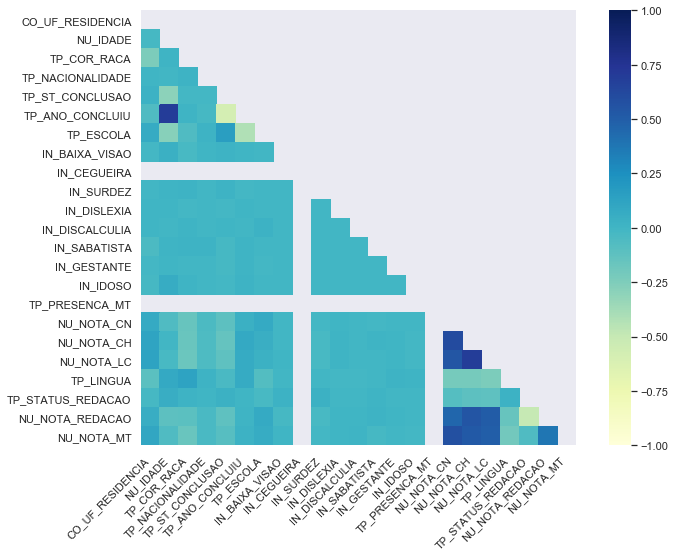

In [29]:
matrix = np.triu(train_aux.corr())
corr = train_aux.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='YlGnBu',
    square=True,
    mask = matrix
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Pelo gráfico de correlação as variáveis `NU_NOTA_CN`, `NU_NOTA_CH`, `NU_NOTA_LC` e `NU_NOTA_REDACAO` apresentam grande correlação positiva com as notas de matemática da base de testes. Assim vamos continuar a análise somente com essas variáveis. 

In [30]:
train_final = pd.DataFrame({'Nota_CieNat': train_aux['NU_NOTA_CN'],
                           'Nota_CieHum': train_aux['NU_NOTA_CH'],
                           'Nota_LingCod': train_aux['NU_NOTA_LC'],
                           'Nota_REDACAO': train_aux['NU_NOTA_REDACAO']})
test_final = pd.DataFrame({'Nota_CieNat': test_aux['NU_NOTA_CN'],
                           'Nota_CieHum': test_aux['NU_NOTA_CH'],
                           'Nota_LingCod': test_aux['NU_NOTA_LC'],
                           'Nota_REDACAO': test_aux['NU_NOTA_REDACAO']})
nota_mat = pd.DataFrame({'Nota_Mat': train_aux['NU_NOTA_MT']})

In [31]:
test_final

,Nota_CieNat,Nota_CieHum,Nota_LingCod,Nota_REDACAO
3,475.0,557.8,542.0,480.0
4,440.5,596.1,594.2,720.0
5,401.1,452.3,458.6,480.0
7,518.8,582.6,572.5,560.0
8,633.5,647.6,668.5,500.0
...,...,...,...,...
4565,425.9,569.7,501.4,620.0
4566,483.0,432.9,457.0,320.0
4567,471.4,570.3,563.8,500.0
4568,492.9,586.1,559.3,520.0


## Distribuição dos dados

Analisando o histograma dos dados

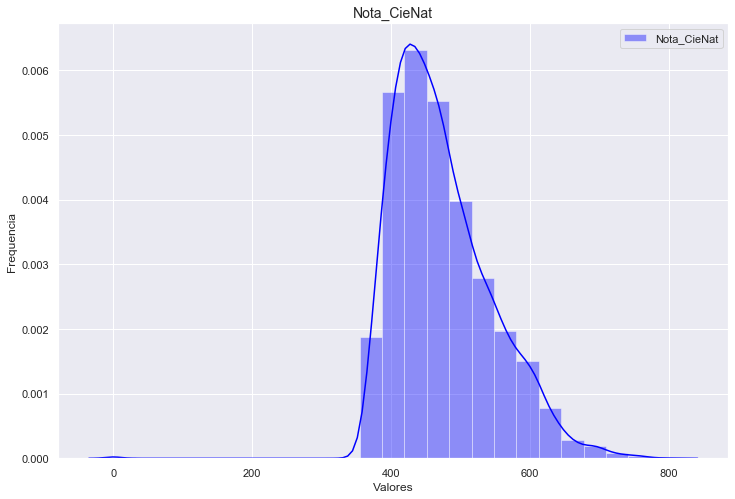

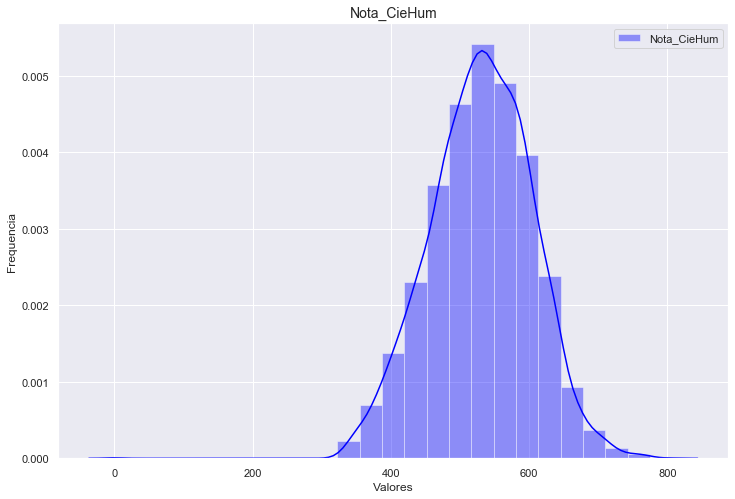

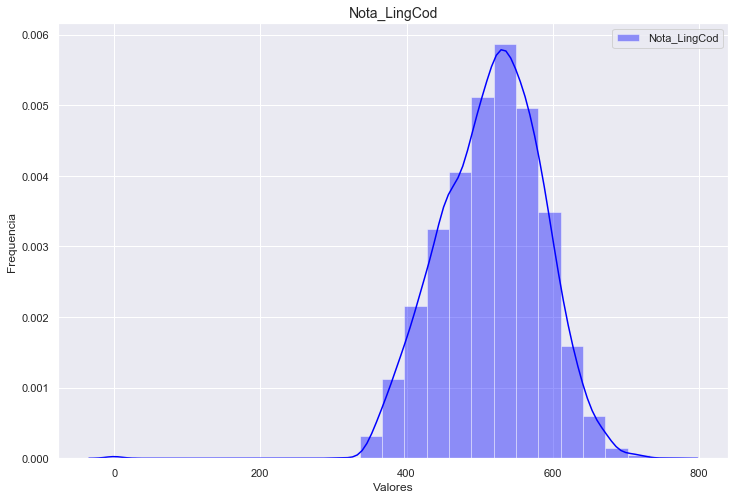

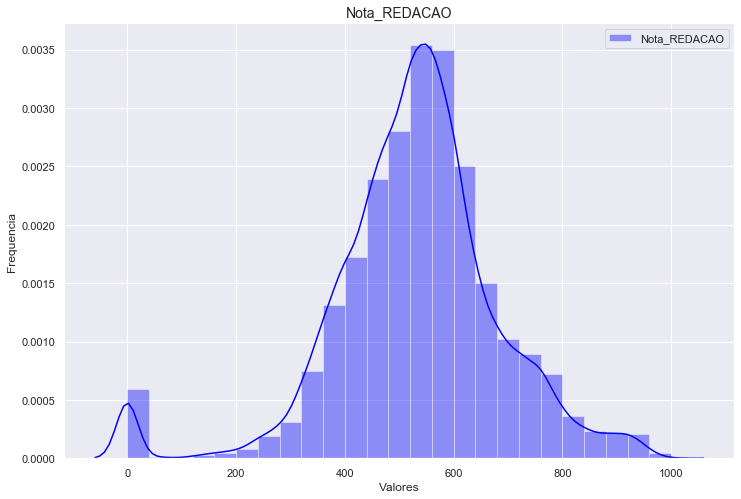

In [32]:
for i in train_final.columns:
    f, ax = plt.subplots(1,1)
    sns.distplot(train_final[i], bins=25, label=i, color='blue')
    ax.set_title(i, fontsize=14)
    ax.set(xlabel='Valores', ylabel='Frequencia')
    ax.legend()

Analisando a presença de outliers nos dados

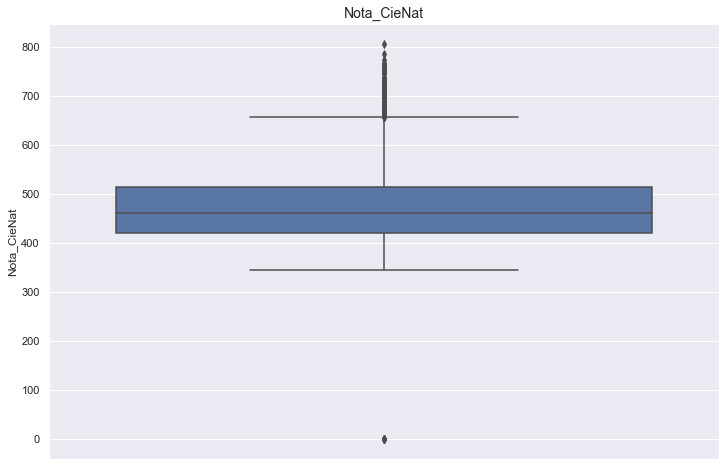

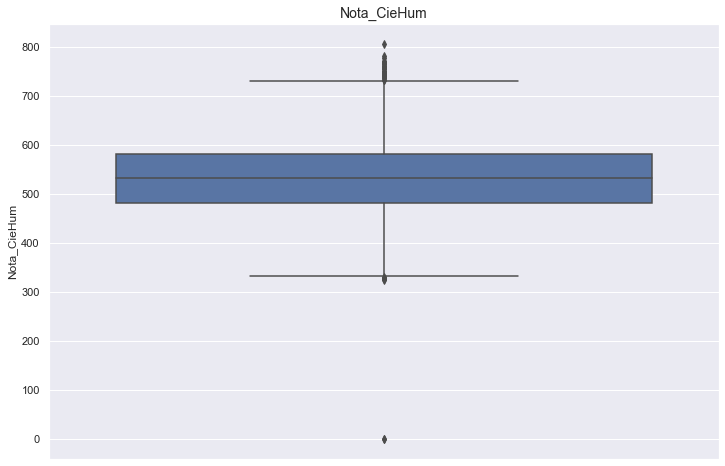

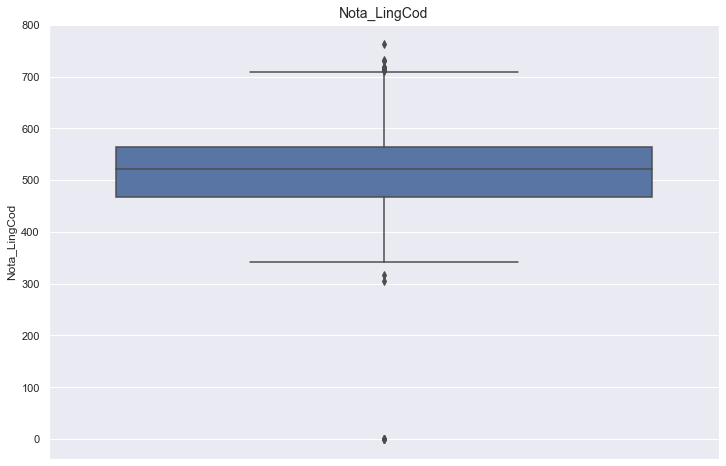

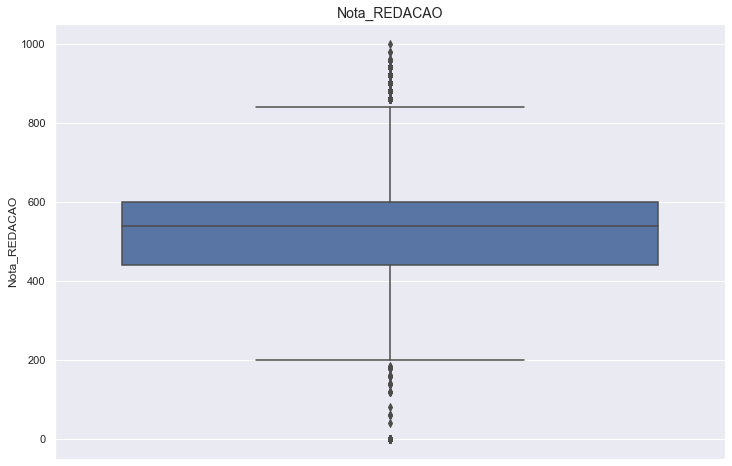

In [33]:
for i in train_final.columns:
    fb, axb = plt.subplots(1,1)
    sns.boxplot(train_final[i], orient="vertical")
    axb.set_title(i, fontsize=14)

Os dados da redação aparentam ter outliers, vamos analisar melhor esses dados:

In [34]:
q1_quant = train_final['Nota_REDACAO'].quantile(0.25)
q3_quant = train_final['Nota_REDACAO'].quantile(0.75)
iqr = q3_quant - q1_quant

non_outlier_interval_iqr = [q1_quant - 1.5 * iqr, q3_quant + 1.5 * iqr]

print(f"Faixa considerada \"normal\": {non_outlier_interval_iqr}") 

Faixa considerada "normal": [200.0, 840.0]


Vamos remover os outliers da faixa inferior

In [35]:
outliers_iqr = train_final['Nota_REDACAO'][(train_final['Nota_REDACAO'] < non_outlier_interval_iqr[0])]

outliers_iqr

90         0.0
92         0.0
111        0.0
191        0.0
256      180.0
         ...  
13575      0.0
13601      0.0
13603      0.0
13658      0.0
13717      0.0
Name: Nota_REDACAO, Length: 277, dtype: float64

In [36]:
train_final_no_outlier_iqr = train_final.drop(index=outliers_iqr.index)
train_final_no_outlier_iqr

,Nota_CieNat,Nota_CieHum,Nota_LingCod,Nota_REDACAO
0,436.3,495.4,581.2,520.0
1,474.5,544.1,599.0,580.0
5,439.7,583.2,410.9,620.0
6,420.1,604.2,484.5,560.0
7,619.6,625.8,611.2,620.0
...,...,...,...,...
13725,438.2,419.7,394.5,440.0
13726,423.8,557.9,533.0,560.0
13727,460.5,528.9,569.3,600.0
13728,422.5,621.7,569.0,460.0


In [37]:
nota_mat_no_outlier_iqr = nota_mat.drop(index=outliers_iqr.index)
nota_mat_no_outlier_iqr

,Nota_Mat
0,399.4
1,459.8
5,364.5
6,529.2
7,566.7
...,...
13725,403.2
13726,452.4
13727,398.0
13728,386.6


## Realizando a regressão Linear

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(train_final_no_outlier_iqr, nota_mat_no_outlier_iqr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
predicted = lin_reg.predict(test_final)
len(predicted)
predicted = pd.Series(predicted.reshape(3400,))

## Ajustando os dados para serem submetidos

In [48]:
predicted_df = pd.DataFrame({'NU_NOTA_MT':predicted})
answer = pd.concat([ID_test, predicted_df], axis = 1, ignore_index = False)
#answer.to_csv(r'address', index=False)